In [3]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.18.1', '1.0.1', '0.16', '1.5.2']


#### Test data

In [4]:
n = 1000
e = lambda n: np.random.laplace(0, 1, n)
x3 = e(n)
x2 = 0.3*x3 + e(n)
x1 = 0.3*x3 + 0.3*x2 + e(n)
x0 = 0.3*x2 + 0.3*x1 + e(n)
x4 = 0.3*x1 + 0.3*x0 + e(n)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4'])
X.head()

,x0,x1,x2,x3,x4
0,-3.180151,-1.488256,-2.864768,0.090811,-0.625644
1,-1.001368,-3.387953,-0.444264,-0.585659,-3.756419
2,0.778307,1.016466,2.320717,-0.163655,-0.421216
3,0.280522,3.000511,-0.460115,1.169740,-0.432969
4,0.937920,-1.459414,-1.892795,-4.663042,0.581040


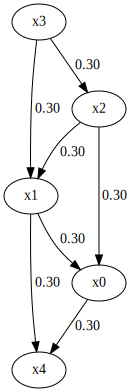

In [5]:
m = np.array([[0.0, 0.3, 0.3, 0.0, 0.0],
              [0.0, 0.0, 0.3, 0.3, 0.0],
              [0.0, 0.0, 0.0, 0.3, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0],
              [0.3, 0.3, 0.0, 0.0, 0.0]])

make_dot(m)

#### DirectLiNGAM_Kernelで構造方程式モデルを推測

In [6]:
model = lingam.DirectLiNGAM(measure='kernel')
model.fit(X)

In [7]:
model.causal_order_

[3, 2, 1, 0, 4]

In [8]:
model.adjacency_matrix_

array([[ 0.   ,  0.331,  0.31 , -0.087,  0.   ],
       [ 0.   ,  0.   ,  0.356,  0.295,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.301,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.213,  0.274,  0.   ,  0.   ,  0.   ]])

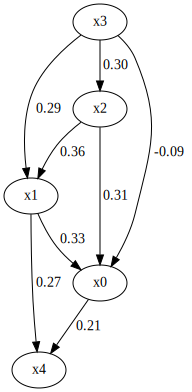

In [9]:
make_dot(model.adjacency_matrix_)